In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [5]:
premium = pd.read_csv('premium2.csv')
premium

,Age,Diabetes,HighBloodPressure,Transplant,ChronicDisease,Height,Weight,Allergy,CancerInFamily,NumMajorSurgeries,Gender,Premium
0,45,0,0,0,0,155,57,0,0,0,0,1250
1,60,1,0,0,0,180,73,0,0,0,1,1450
2,36,1,1,0,0,158,59,0,0,1,1,1150
3,52,1,1,0,1,183,93,0,0,2,0,1400
4,38,0,0,0,1,166,88,0,0,1,1,1150
...,...,...,...,...,...,...,...,...,...,...,...,...
983,18,0,0,0,0,169,67,0,0,0,0,750
984,64,1,1,0,0,153,70,0,0,3,0,1400
985,56,0,1,0,0,155,71,0,0,1,0,1450
986,47,1,1,0,0,158,73,1,0,1,1,1950


1.
Create the BMI variable based on CDC definition1. Show your code or formula used, and the BMI values for the first three rows of data provided.

In [6]:
# Turning height units from cm to m
premium['Height'] = premium['Height']/100

# Calculating BMI
premium['BMI'] = premium['Weight']/(premium['Height'])**2
premium

,Age,Diabetes,HighBloodPressure,Transplant,ChronicDisease,Height,Weight,Allergy,CancerInFamily,NumMajorSurgeries,Gender,Premium,BMI
0,45,0,0,0,0,1.55,57,0,0,0,0,1250,23.725286
1,60,1,0,0,0,1.80,73,0,0,0,1,1450,22.530864
2,36,1,1,0,0,1.58,59,0,0,1,1,1150,23.634033
3,52,1,1,0,1,1.83,93,0,0,2,0,1400,27.770313
4,38,0,0,0,1,1.66,88,0,0,1,1,1150,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,18,0,0,0,0,1.69,67,0,0,0,0,750,23.458562
984,64,1,1,0,0,1.53,70,0,0,3,0,1400,29.903029
985,56,0,1,0,0,1.55,71,0,0,1,0,1450,29.552549
986,47,1,1,0,0,1.58,73,1,0,1,1,1950,29.242109


2.
Explore the data and report 3 key findings.  
  
1. Older people pay a higher premium, almost twice as much as younger people

<Axes: xlabel='Age Group', ylabel='Premium'>

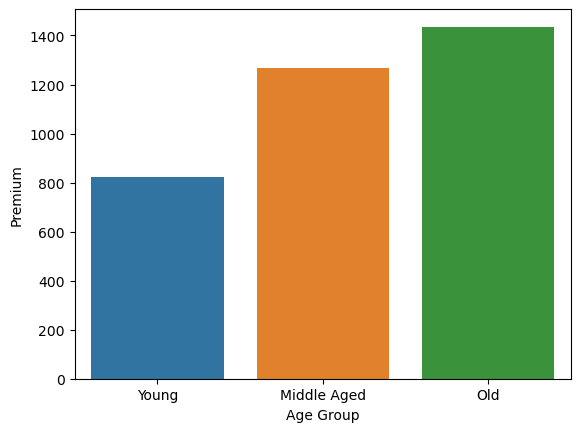

In [ ]:
def age_group(Age):
    if Age < 30:
        return 'Young'
    elif Age > 48:
        return 'Old'
    else: 
        return 'Middle Aged'

premium['Age Group'] = premium['Age'].apply(age_group)

# Calculate mean premium per age group and sort
sorted_premium = premium.groupby('Age Group', as_index=False)['Premium'].mean().sort_values(by='Premium')

# Plotting the barplot with sorted order
sns.barplot(x='Age Group', y='Premium', data=sorted_premium, order=sorted_premium['Age Group'])

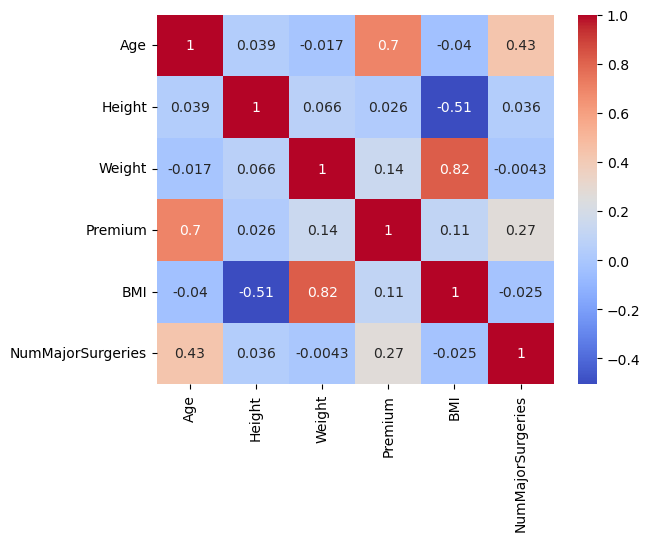

In [8]:
# Calculate the correlation matrix
corr_matrix = premium[['Age', 'Height', 'Weight', 'Premium', 'BMI', 'NumMajorSurgeries']].corr()

# Plotting the heatmap
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [21]:
from scipy.stats import ttest_ind

conditions = ['Diabetes', 'HighBloodPressure', 'Transplant', 'ChronicDisease', 'CancerInFamily']

for condition in conditions:
    mean_premium = premium.groupby(condition)['Premium'].mean()
    print(f'Avg Premium with {condition}')
    print(mean_premium)
    print("\n")

Avg Premium with Diabetes
Diabetes
0    1195.557491
1    1244.806763
Name: Premium, dtype: float64


Avg Premium with HighBloodPressure
HighBloodPressure
0    1167.142857
1    1271.814255
Name: Premium, dtype: float64


Avg Premium with Transplant
Transplant
0    1194.265809
1    1588.181818
Name: Premium, dtype: float64


Avg Premium with ChronicDisease
ChronicDisease
0    1185.555556
1    1355.617978
Name: Premium, dtype: float64


Avg Premium with CancerInFamily
CancerInFamily
0    1206.651376
1    1287.931034
Name: Premium, dtype: float64




c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

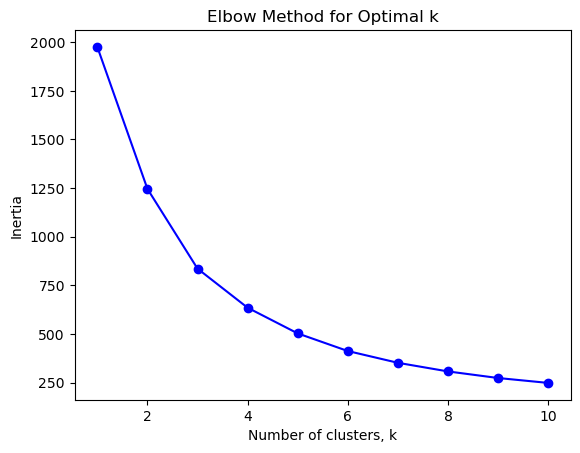

In [43]:
# features = premium.drop(columns=['Premium', 'Age Group', 'Diabetes', 'HighBloodPressure', 'Transplant', 'ChronicDisease'])
features = premium[['Age', 'BMI']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Using elbow plot to identify optimal number of clusters
inertia = []
K = range(1,11)
for k in K:
    kmeansmodel = KMeans(n_clusters = k, random_state = 69)
    kmeansmodel.fit(X_scaled)
    inertia.append(kmeansmodel.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Spence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Spence\AppData\Local\Temp\ipykernel_2028\397981624.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = premium.groupby('Cluster').mean()


               Age  Diabetes  HighBloodPressure  Transplant  ChronicDisease  \
Cluster                                                                       
0        29.014981  0.337079           0.352060    0.063670        0.176030   
1        52.625984  0.500000           0.527559    0.066929        0.161417   
2        53.014493  0.507246           0.576087    0.036232        0.221014   
3        28.664921  0.298429           0.397906    0.057592        0.151832   

           Height     Weight   Allergy  CancerInFamily  NumMajorSurgeries  \
Cluster                                                                     
0        1.715318  69.610487  0.224719        0.116105           0.408240   
1        1.643622  86.019685  0.228346        0.102362           0.905512   
2        1.724891  67.873188  0.188406        0.123188           0.920290   
3        1.624084  88.115183  0.219895        0.130890           0.340314   

           Gender      Premium        BMI  
Cluster           

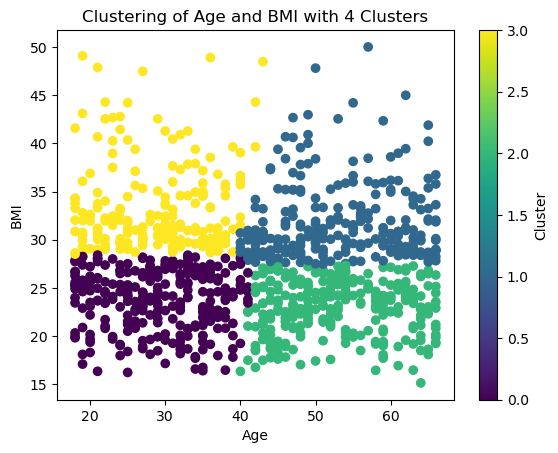

In [47]:
optimal_k = 4
model = KMeans(n_clusters = optimal_k, random_state = 69)
premium['Cluster'] = model.fit_predict(X_scaled)

cluster_summary = premium.groupby('Cluster').mean()
print(cluster_summary)

# Visualize the clusters in 2D (Age vs BMI)
plt.scatter(premium['Age'], premium['BMI'], c=premium['Cluster'], cmap='viridis')
plt.title(f'Clustering of Age and BMI with {optimal_k} Clusters')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Cluster')
plt.show()

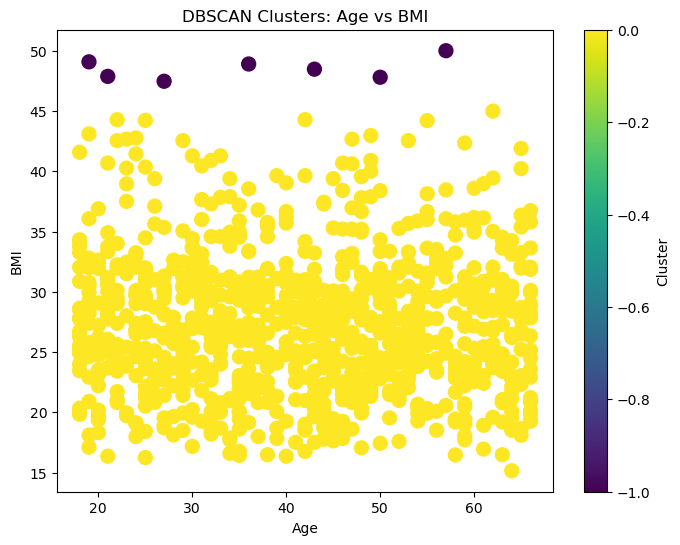

               Age  Diabetes  HighBloodPressure  Transplant  ChronicDisease  \
Cluster                                                                       
-1       36.142857  0.285714           0.142857    0.000000        0.000000   
 0       41.761468  0.419980           0.470948    0.056065        0.181448   

           Height      Weight   Allergy  CancerInFamily  NumMajorSurgeries  \
Cluster                                                                      
-1       1.595714  123.571429  0.285714        0.142857           0.571429   
 0       1.682538   76.588175  0.214067        0.117227           0.666667   

           Gender      Premium        BMI  
Cluster                                    
-1       0.714286  1271.428571  48.512164  
 0       0.455657  1215.800204  27.297061  


C:\Users\Spence\AppData\Local\Temp\ipykernel_2028\182910938.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = premium.groupby('Cluster').mean()


In [51]:
from sklearn.cluster import DBSCAN

features = premium[['Age', 'BMI']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

db = DBSCAN(eps=0.5, min_samples=5)
premium['Cluster'] = db.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))

# Scatter plot, color points by their cluster
plt.scatter(premium['Age'], premium['BMI'], c=premium['Cluster'], cmap='viridis', marker='o', s=100)
plt.title('DBSCAN Clusters: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.colorbar(label='Cluster')
plt.show()

cluster_summary = premium.groupby('Cluster').mean()
print(cluster_summary)


3.
Using Linear Regression:  
a.  
Explain how you will select the “optimal” subset of X variables in your final linear regression model.  
b.  
Do a 70-30 train-test split and report on the testset RMSE. Explain the meaning of RMSE.  
c.  
Is BMI or Gender important in determining premium?  

In [ ]:
'''
Preliminary regression to find P-Value to determine statistical significance of explanatory variables
'''

X = premium.drop(columns=['Premium', 'Age Group', 'Height', 'Weight', 'NumMajorSurgeries']) 
y = premium['Premium'] 

# Intercept term
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Fitting OLS using sm first
model = sm.OLS(y_train, X_train).fit()

# Model Summary
print(model.summary())

# Calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")


                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     118.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          6.07e-133
Time:                        11:01:27   Log-Likelihood:                -4634.9
No. Observations:                 691   AIC:                             9290.
Df Residuals:                     681   BIC:                             9335.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               350.9713     44.48

In [22]:
'''
We remove Height and Weight as they are multicollinear with BMI.
We also remove NumMajorSurgeries due to the low linear correlation to Premiums.
These results are seen in the correlation heatmap above.

We removed Allergy, HighBloodPressure and Gender as in the preliminary OLS done before, the P-Values were >0.05, indicating a lack of statistical significance.
'''

X = premium.drop(columns=['Premium', 'Age Group', 'Height', 'Weight', 'NumMajorSurgeries', 'HighBloodPressure', 'Allergy', 'Gender']) 
y = premium['Premium']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 69
)

# Intercept term
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Fitting OLS using sm first
model = sm.OLS(y_train, X_train).fit()

# Model Summary
print(model.summary())

# Calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          4.21e-136
Time:                        14:14:09   Log-Likelihood:                -4635.3
No. Observations:                 691   AIC:                             9285.
Df Residuals:                     684   BIC:                             9316.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            348.8240     43.788      7.